In [18]:
import pandas as pd
from preprocessing import preprocess_hf_for_lasso
from sklearn.model_selection import train_test_split

TEST_SIZE=0.2

heart_failure = pd.read_csv("heart_failure/train_val_split.csv")
labels = heart_failure.pop("HeartDisease")
preprocessed = preprocess_hf_for_lasso(heart_failure)
x_train, x_val, y_train, y_val = train_test_split(preprocessed, labels, test_size=TEST_SIZE)



In [19]:
from sklearn import linear_model
from sklearn.metrics import balanced_accuracy_score

# logistic regularization with L1 penalty is essentialy lasso
lasso = linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=1)
lasso.fit(x_train, y_train)
results = lasso.predict(x_val)
balanced_accuracy_score(y_val, results)

0.855410447761194

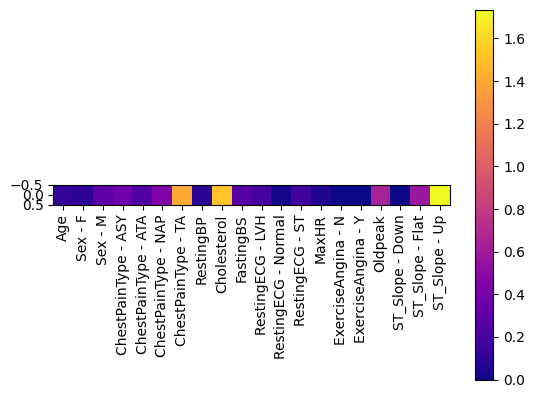

In [23]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
from preprocessing import PREPROCESSED_COLUMN_NAMES
# features should correspond to the weights. I have done this manually, so there might be errors, but I don't know a better way to do it.
# weights = np.abs(lasso.coef_)
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(PREPROCESSED_COLUMN_NAMES)), labels=PREPROCESSED_COLUMN_NAMES, rotation=90)
im = ax.imshow(np.abs(lasso.coef_), cmap="plasma")
plt.colorbar(im)
plt.show()


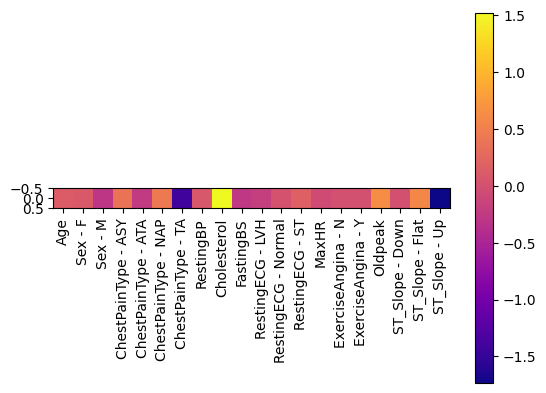

In [25]:
#show absolute value of 
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(PREPROCESSED_COLUMN_NAMES)), labels=PREPROCESSED_COLUMN_NAMES, rotation=90)
im = ax.imshow(lasso.coef_, cmap="plasma")
plt.colorbar(im)
plt.show()


In [22]:
# accuracy on the test set
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
heart_failure = pd.read_csv("heart_failure/test_split.csv")
labels = heart_failure.pop("HeartDisease")
preprocessed = preprocess_hf_for_lasso(heart_failure)
y_pred = lasso.predict(preprocessed)
print(f"accuracy: {accuracy_score(labels, y_pred)}")
print(f"balanced accuracy: {balanced_accuracy_score(labels, y_pred)}")
print(f"f1 score: {f1_score(labels, y_pred)}")


accuracy: 0.8369565217391305
balanced accuracy: 0.826044226044226
f1 score: 0.8660714285714286
